# **Netflix Dataset Analysis Project**
**Author :** Akhila
**Project Summary :** The Netflix Dataset Analysis explores trends in Netflix’s content library using a dataset of 7,789 records (2008–2021). The study examines the distribution of Movies vs. TV Shows, popular genres, and country-wise contributions. Through data analysis and visualization, it highlights how Netflix’s content strategy has evolved—showing a rise in TV Shows, diverse genres, and increased global participation. The insights help identify key audience preferences and support strategic recommendations for future content planning.

## 1️⃣ Import Required Libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-pastel')



## 2️⃣ Load Dataset



In [ ]:
df = pd.read_csv("Netflix Dataset.csv")

# Display basic info
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()

Dataset Shape: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


##3️⃣ Data Cleaning & Preprocessing

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing values where appropriate
df['Country'].fillna('Unknown', inplace=True)
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)

# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract Year from Release_Date
df['Release_Year'] = df['Release_Date'].dt.year

# Clean text columns (remove extra spaces)
df['Category'] = df['Category'].str.strip()
df['Type'] = df['Type'].str.strip()


Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


## 4️⃣ Analysis 1: Movies vs. TV Shows Over the Years

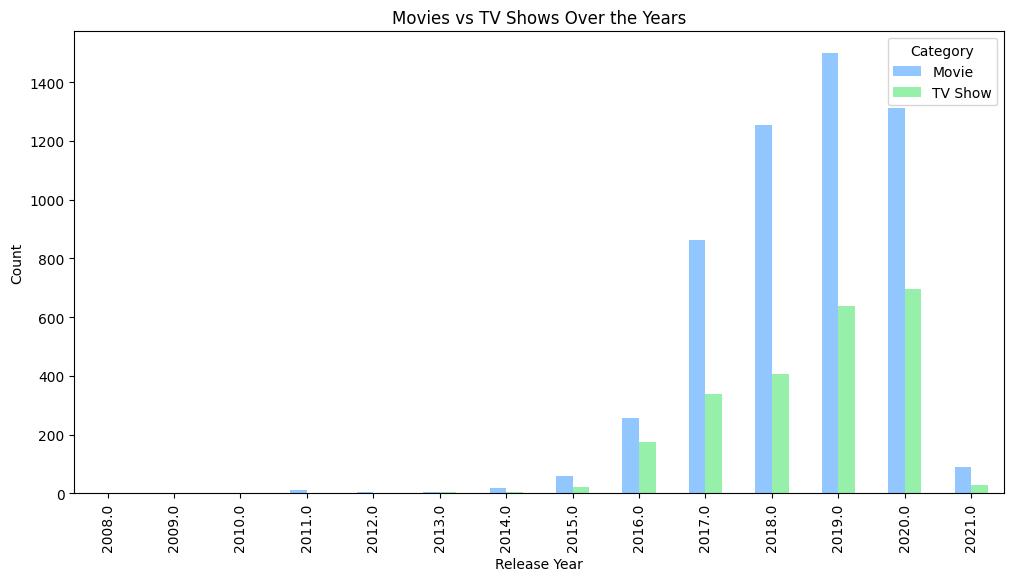

In [ ]:
# Count of Movies vs TV Shows per year
category_trend = df.groupby(['Release_Year', 'Category']).size().unstack().fillna(0)

# Plot trend
category_trend.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title("Movies vs TV Shows Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend(title='Category')
plt.show()

##5️⃣ Analysis 2: Most Common Genres and Popularity Trends

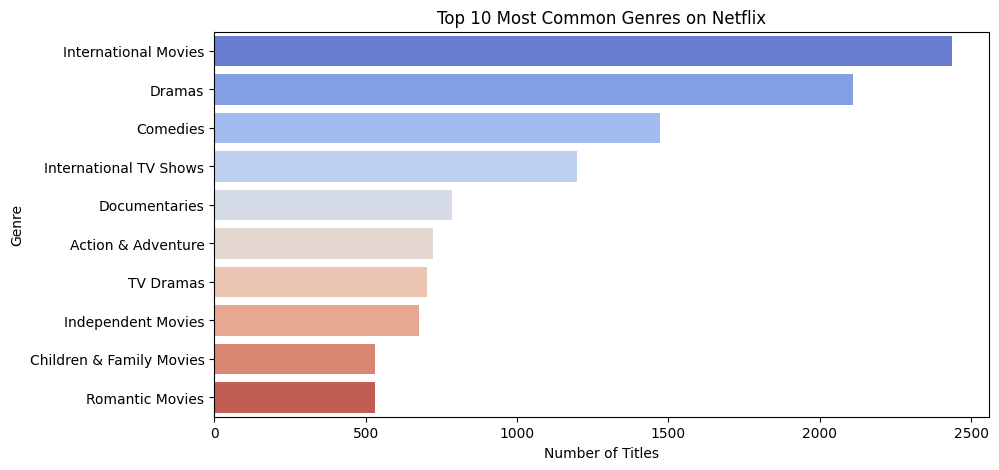

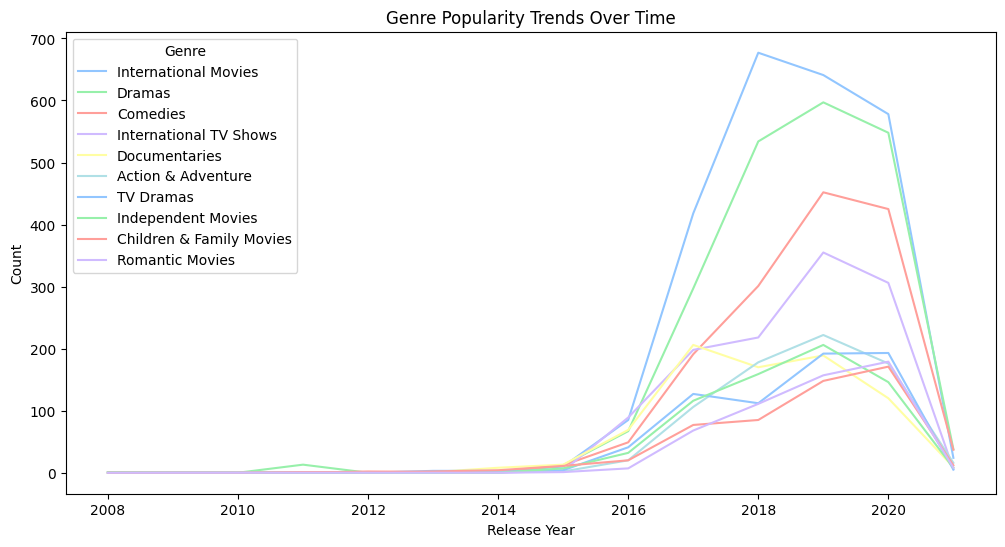

In [ ]:
# Split multiple genres in 'Type' column
df_genres = df.assign(Type=df['Type'].str.split(',')).explode('Type')
df_genres['Type'] = df_genres['Type'].str.strip()

# Count top genres
top_genres = df_genres['Type'].value_counts().head(10)

# Plot top genres
plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="coolwarm")
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

# Genre trend over years
genre_trend = df_genres.groupby(['Release_Year', 'Type']).size().unstack(fill_value=0)
genre_trend[top_genres.index].plot(figsize=(12,6))
plt.title("Genre Popularity Trends Over Time")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend(title='Genre')
plt.show()


##6️⃣ Analysis 3: Country-wise Contribution

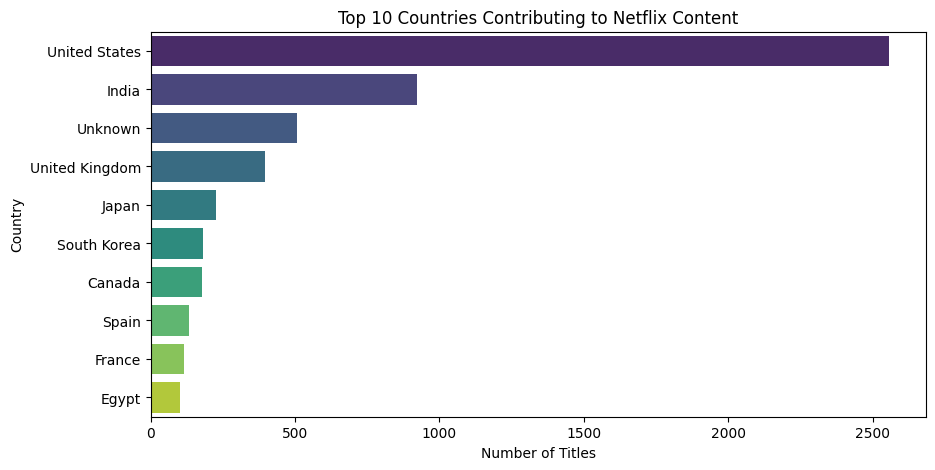

In [ ]:
# Count by country
country_data = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_data.values, y=country_data.index, palette='viridis')
plt.title("Top 10 Countries Contributing to Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


##**Conclusion:**
The analysis shows that Netflix has steadily increased its focus on TV Shows, diversified across genres, and expanded globally. Popular categories like Drama and International Content reflect its efforts to appeal to a wide audience.

##**Future Scope:**
Future studies can include viewership data, apply machine learning for trend prediction, add recent data, compare with other OTT platforms, and create interactive dashboards for better insights.